### Kaggle Credit Card Fraud Detection Dataset

#### Logistic Regression (baseline)

#### What is logistic regression?

#### Source: https://www.machinelearningnuggets.com/logistic-regression/

Logistic regression is a supervised **classification** model known as the **logit** model. It estimates the **probability** of something occurring, like 'will buy' or 'will not buy,' based on a dataset of independent variables. The outcome should be a categorical or a discrete value. The outcome can be either a 0 and 1, true and false, yes and no, and so on.

The model does not give an exact 0 and 1 but a value between 0 and 1. Unlike linear regression, which fits a regression line, logistic regression fits an 'S'-shaped logistic function (**Sigmoid function**).

![Sigmoid function](./visualization-of-the-sigmoid-function.png)

#### Assumptions of logistic regression

Logistic regression assumes that:

-  The response variable is **binary** or **dichotomous**.

-  The observations or independent variables have very little or **no multicollinearity**.

-  There are **no extreme outliers**.

-  There is a **linear relationship** between the predictor variables and the log-odds of the response variable.

-  **Large sample sizes** for a more reliable analysis.

#### Importing libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# set plot figure size to 15 x 12
plt.rcParams["figure.figsize"] = (15, 12)

In [2]:
# import sklearn
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

#### Reading encoded train and test datasets

In [3]:
train_df = pd.read_pickle('./data/train_encoded.pkl')
train_df

,amt,gender,lat,long,city_pop,is_fraud,age,log_amt,trans_month,trans_day,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,265.89,1,41.0646,-87.5917,2135,0,14,5.586837,7,25,...,0,0,0,0,0,0,0,0,0,0
1,68.21,0,44.8393,-69.2675,3228,0,23,4.237145,10,23,...,0,0,0,0,0,0,0,0,0,0
2,95.39,1,38.2911,-92.7059,1847,0,30,4.568402,3,30,...,0,0,0,0,0,0,0,0,0,0
3,21.39,0,39.0130,-86.5457,76,0,63,3.108614,1,28,...,0,0,0,0,0,0,0,0,0,0
4,36.53,1,34.1832,-81.5324,8333,0,24,3.625141,4,24,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
388998,853.27,0,44.2529,-85.0170,1126,1,63,6.750247,8,29,...,0,0,0,0,0,0,0,0,0,0
388999,750.98,0,38.5072,-81.8900,5512,1,38,6.622710,2,15,...,0,0,0,0,0,0,0,0,1,0
389000,309.71,1,34.3424,-80.5000,4424,1,57,5.738860,9,7,...,0,0,0,0,0,0,0,0,0,0
389001,328.28,1,36.2835,-87.4581,70,1,62,5.796908,5,30,...,0,1,0,0,0,0,0,0,0,0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389003 entries, 0 to 389002
Data columns (total 87 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             389003 non-null  float64
 1   gender                          389003 non-null  int64  
 2   lat                             389003 non-null  float64
 3   long                            389003 non-null  float64
 4   city_pop                        389003 non-null  int64  
 5   is_fraud                        389003 non-null  int64  
 6   age                             389003 non-null  int64  
 7   log_amt                         389003 non-null  float64
 8   trans_month                     389003 non-null  int64  
 9   trans_day                       389003 non-null  int64  
 10  trans_wday                      389003 non-null  int64  
 11  is_weekend                      389003 non-null  int64  
 12  trans_hour      

In [5]:
test_df = pd.read_pickle('./data/test_encoded.pkl')
test_df

,amt,gender,lat,long,city_pop,is_fraud,age,log_amt,trans_month,trans_day,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,2.86,0,33.9659,-80.9355,333497,0,52,1.350667,6,21,...,0,0,0,0,0,0,0,0,0,0
1,29.84,1,40.3207,-110.4360,302,0,30,3.428813,6,21,...,0,0,0,1,0,0,0,0,0,0
2,41.28,1,40.6729,-73.5365,34496,0,49,3.744314,6,21,...,0,0,0,0,0,0,0,0,0,0
3,60.05,0,28.5697,-80.8191,54767,0,32,4.111693,6,21,...,0,0,0,0,0,0,0,0,0,0
4,3.19,0,44.2529,-85.0170,1126,0,65,1.432701,6,21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,0,40.4931,-91.8912,519,0,54,3.801538,12,31,...,0,0,0,0,0,0,0,0,0,0
555715,111.84,0,29.0393,-95.4401,28739,0,20,4.725971,12,31,...,0,0,1,0,0,0,0,0,0,0
555716,86.88,1,46.1966,-118.9017,3684,0,38,4.475972,12,31,...,0,0,0,0,0,0,1,0,0,0
555717,7.99,0,44.6255,-116.4493,129,0,54,2.196113,12,31,...,0,0,0,0,0,0,0,0,0,0


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 87 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   amt                             555719 non-null  float64
 1   gender                          555719 non-null  int64  
 2   lat                             555719 non-null  float64
 3   long                            555719 non-null  float64
 4   city_pop                        555719 non-null  int64  
 5   is_fraud                        555719 non-null  int64  
 6   age                             555719 non-null  int64  
 7   log_amt                         555719 non-null  float64
 8   trans_month                     555719 non-null  int64  
 9   trans_day                       555719 non-null  int64  
 10  trans_wday                      555719 non-null  int64  
 11  is_weekend                      555719 non-null  int64  
 12  trans_hour      

In [7]:
# seperating independent and dependent variables
X = train_df.drop(['is_fraud'], axis=1)
y = train_df['is_fraud']
X.shape, y.shape

((389003, 86), (389003,))

In [8]:
# splitting dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1010)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(311202, 86)
(77801, 86)
(311202,)
(77801,)


In [10]:
print(y_train.value_counts(normalize = True), '\n')
print(y_test.value_counts(normalize = True))

0    0.99421
1    0.00579
Name: is_fraud, dtype: float64 

0    0.994216
1    0.005784
Name: is_fraud, dtype: float64


In [27]:
# make pipeline with StandardScaler() and LgisticRegression()
log_reg = make_pipeline(StandardScaler(), LogisticRegression()
# log_reg = make_pipeline(StandardScaler(), LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, class_weight='balanced'))
log_reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced', l1_ratio=0.5,
                                    penalty='elasticnet', solver='saga'))])

In [28]:
# Roc_auc score
log_reg_roc_auc_score = roc_auc_score(y_test, log_reg.predict(X_test)).round(4)
log_reg_roc_auc_score

0.9056

#### Confusion matrix

![Confusion matrix](./confusion-matrix.png)

In [29]:
# confusion matrix
log_reg_conf_mat = confusion_matrix(y_test, log_reg.predict(X_test)).round(4)
log_reg_conf_mat

array([[70820,  6531],
       [   47,   403]])

In [30]:
# confusion matrix normalized
log_reg_conf_mat = confusion_matrix(y_test, log_reg.predict(X_test), normalize = 'true').round(3)
log_reg_conf_mat

array([[0.916, 0.084],
       [0.104, 0.896]])

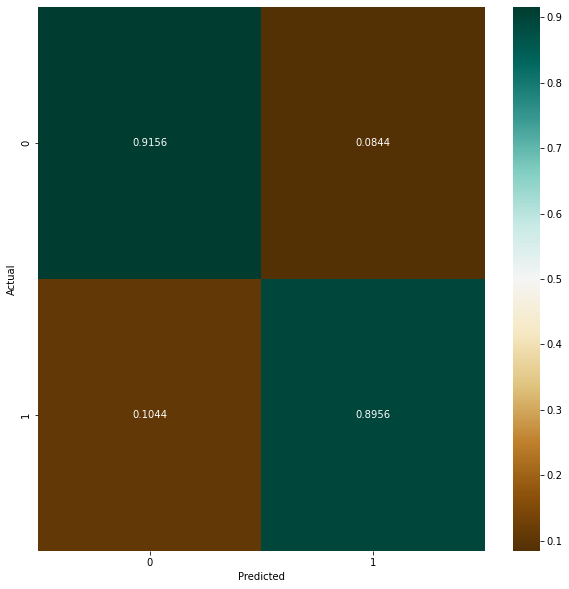

In [31]:
# using seaborn
# Source: https://stackoverflow.com/questions/20927368/how-to-normalize-a-confusion-matrix
cm = confusion_matrix(y_test, log_reg.predict(X_test))

# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmn, annot=True, fmt='.4f', cmap='BrBG')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [32]:
# logistic regression model coefficient estimates
feature_names = X_train.columns.to_list()
log_reg_coef = log_reg[-1].coef_
# print(list(zip(feature_names, log_reg_coef)))
log_reg_coef_df = pd.DataFrame(feature_names, log_reg_coef.tolist()).reset_index()

In [33]:
log_reg_coef_df = log_reg_coef_df.set_axis(['coef_estimates', 'feature'], axis = 1)
log_reg_coef_df = log_reg_coef_df.iloc[:, ::-1]
# log_reg_coef_df.iloc[(-log_reg_coef_df['coef_estimates'].abs()).argsort()]


In [34]:

log_reg_coef_df['coef_estimate_abs'] = log_reg_coef_df['coef_estimates'].abs()
log_reg_coef_df.sort_values(by = 'coef_estimate_abs', ascending = False)

,feature,coef_estimates,coef_estimate_abs
0,amt,2.870576,2.870576
21,cc_num_updated,1.514479,1.514479
34,category_shopping_pos,-1.333918,1.333918
33,category_shopping_net,-1.013315,1.013315
24,category_gas_transport,0.869300,0.869300
...,...,...,...
65,state_NH,0.004490,0.004490
62,state_NC,0.002288,0.002288
66,state_NJ,-0.002233,0.002233
43,state_DC,-0.000218,0.000218


<AxesSubplot:xlabel='coef_estimates', ylabel='feature'>

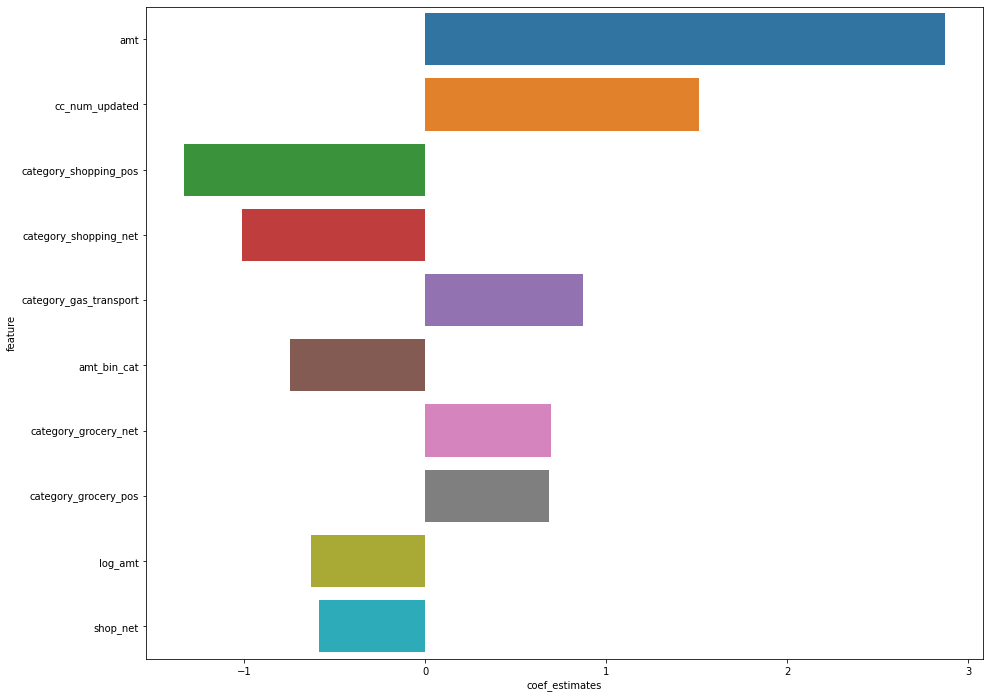

In [35]:
# plot bar sorted by 'ceof_estimate_abs' descending
# Source: https://www.geeksforgeeks.org/seaborn-sort-bars-in-barplot/
sns.barplot(data = log_reg_coef_df, 
            x = 'coef_estimates', 
            y = 'feature', 
            order = log_reg_coef_df.sort_values('coef_estimate_abs', ascending = False).feature[:10])

#### ROC curve

![Roc curve example](./roc-curve_nearly-perfect.png)

Source: https://www.sharpsightlabs.com/blog/plot-roc-curve-in-python-seaborn/

In [36]:
# roc curve parameters
# Source: https://www.statology.org/plot-roc-curve-python/

# define metrics
y_pred_proba = log_reg.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba).round(4)

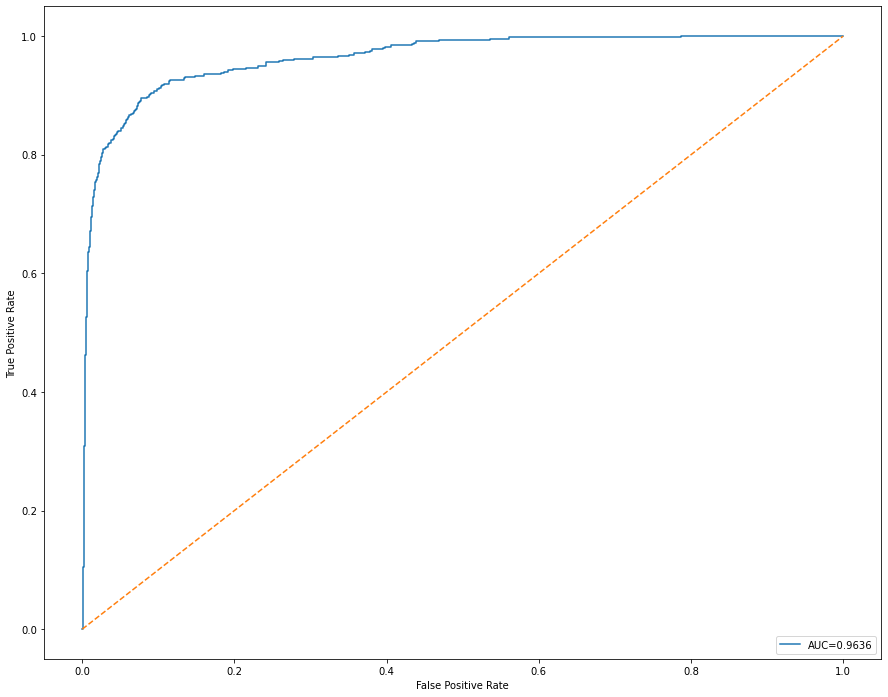

In [37]:
# create ROC curve
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [38]:
# new test data
X_test_new = test_df.drop(['is_fraud'], axis=1)
y_test_new = test_df['is_fraud']

In [39]:
# Roc_auc score (test_new)
log_reg_roc_auc_score_test_new = roc_auc_score(y_test_new, log_reg.predict(X_test_new)).round(4)
log_reg_roc_auc_score_test_new

0.7645

In [40]:
# confusion matrix (test_new)
log_reg_conf_mat_test_new = confusion_matrix(y_test_new, log_reg.predict(X_test_new)).round(4)
log_reg_conf_mat_test_new

array([[516618,  36956],
       [   867,   1278]])

In [41]:
# roc curve parameters
# Source: https://www.statology.org/plot-roc-curve-python/

# define metrics
y_pred_proba_test_new = log_reg.predict_proba(X_test_new)[::,1]
fpr_test_new, tpr_test_new, _ = roc_curve(y_test_new,  y_pred_proba_test_new)
auc = roc_auc_score(y_test_new, y_pred_proba_test_new).round(4)

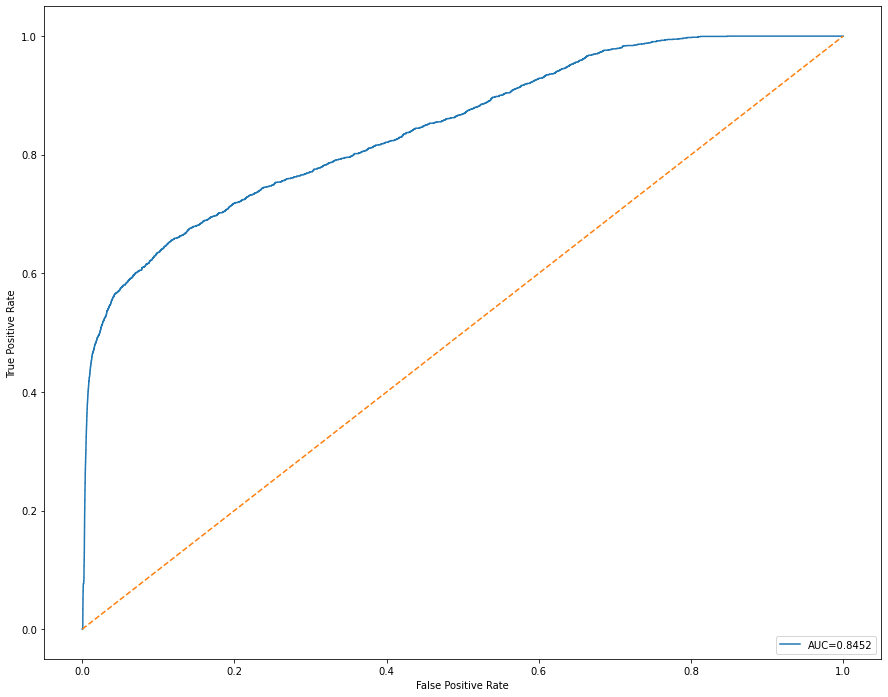

In [42]:
# create ROC curve
plt.plot(fpr_test_new, tpr_test_new, label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()